## Importación y vista rapida de datos

In [114]:
# Importación de librerías necesarias
import sqlite3
import pandas as pd
from datetime import datetime
import os

In [3]:
# Conexión a la base de datos
conn = sqlite3.connect('../database/ai_sales_strategy.db')

In [4]:
# Lectura inicial de las tablas
prospects = pd.read_sql('SELECT * FROM prospects', conn)
companies = pd.read_sql('SELECT * FROM companies', conn)
comments = pd.read_sql('SELECT * FROM comments', conn)

In [5]:
# Verificar carga correcta Prospects
print(f"Prospects: {prospects.shape}")

Prospects: (100000, 12)


In [6]:
# Verificar columnas prospects
print("Columnas en 'prospects':", prospects.columns.tolist())

Columnas en 'prospects': ['name', 'surname', 'company_id', 'department', 'job_title', 'email', 'phone', 'linkedin_url', 'treatment', 'website', 'lead_source', 'level']


In [7]:
# Verificar carga correcta Companies
print(f"Companies: {companies.shape}")

Companies: (20, 7)


In [8]:
# Verificar columnas companies
print("Columnas en 'companies':", companies.columns.tolist())

Columnas en 'companies': ['id', 'name', 'sector', 'revenue', 'address', 'cif', 'country']


In [9]:
# Verificar carga correcta Comments
print(f"Comments: {comments.shape}")

Comments: (50000, 3)


In [10]:
# Verificar columnas comments
print("Columnas en 'comments':", comments.columns.tolist())

Columnas en 'comments': ['id', 'prospect_id', 'comment']


In [11]:
#visualizacion ejemplo de prospects
prospects.head(3)

,name,surname,company_id,department,job_title,email,phone,linkedin_url,treatment,website,lead_source,level
0,Javier,Torres,2,Recursos Humanos,Manager de Ventas,javier.torres@másorange.com,629504159,https://www.linkedin.com/in/javier-torres-384,Sr.,https://másorange.com,Derivado por otro lead,Manager
1,Carlos,Sánchez,2,Ventas,Especialista en Marketing,carlos.sánchez@másorange.com,656119448,https://www.linkedin.com/in/carlos-sánchez-969,Sr.,https://másorange.com,Derivado por otro lead,Director
2,María,Gómez,11,Marketing,Manager de Ventas,maría.gómez@alticeportugal.com,696114680,https://www.linkedin.com/in/maría-gómez-809,Sr.,https://alticeportugal.com,Derivado por otro lead,Otros


In [12]:
#visualizacion ejemplo de companies
companies.head(3)

,id,name,sector,revenue,address,cif,country
0,1,Telefónica,Telecomunicaciones,39000000000,"Madrid, España",A28015865,España
1,2,MásOrange,Telecomunicaciones,18600000000,"Pozuelo de Alarcón, España",A82897492,España
2,3,Vodafone España,Telecomunicaciones,4600000000,"Madrid, España",A80907397,España


In [13]:
#visualizacion ejemplo de Comments
comments.head(3)

,id,prospect_id,comment
0,1,38948,Interesado en soluciones AI para ventas.
1,2,24478,Considerando cambio de proveedor.
2,3,94064,Interesado en soluciones AI para ventas.


## Preparar datos

---- Ajustar IDs e índices para análisis ----

In [ ]:
# Companies: definir claramente 'id' como índice
companies.set_index('id', inplace=True)

In [17]:
# Prospectos: convertir índice en columna 'prospect_id'
prospects.reset_index(inplace=True)
prospects.rename(columns={'index': 'prospect_id'}, inplace=True)
prospects.set_index('prospect_id', inplace=True)

In [18]:
# Comments: usar 'id' como índice
comments.set_index('id', inplace=True)

In [19]:
# Asegurar tipos numéricos claramente y limpiar posibles errores
prospects['company_id'] = pd.to_numeric(prospects['company_id'], errors='coerce')
prospects.dropna(subset=['company_id'], inplace=True)
prospects['company_id'] = prospects['company_id'].astype(int)

companies.index = pd.to_numeric(companies.index, errors='coerce')
companies.dropna(axis=0, inplace=True)
companies.index = companies.index.astype(int)

comments['prospect_id'] = pd.to_numeric(comments['prospect_id'], errors='coerce')
comments.dropna(subset=['prospect_id'], inplace=True)
comments['prospect_id'] = comments['prospect_id'].astype(int)

In [20]:
# Verificación final rápida
print("✅ Datos preparados correctamente tras ajustes:")
print(f"Prospects: {prospects.shape}")
print(f"Companies: {companies.shape}")
print(f"Comments: {comments.shape}")

✅ Datos preparados correctamente tras ajustes:
Prospects: (100000, 12)
Companies: (20, 6)
Comments: (50000, 2)


---- Análisis claro y limpio de calidad de datos ----

In [22]:
# 🔗 Integridad referencial Companies → Prospects
missing_companies = set(prospects['company_id']) - set(companies.index)
print(f"🔴 Prospectos con empresa no registrada: {len(missing_companies)}")

# 🔗 Integridad referencial Prospects → Comments
comments_prospects = set(comments['prospect_id'])
prospects_actual = set(prospects.index)

missing_prospect_comments = comments_prospects - prospects_actual
print(f"🔴 Comentarios con prospectos inexistentes: {len(missing_prospect_comments)}")

🔴 Prospectos con empresa no registrada: 0
🔴 Comentarios con prospectos inexistentes: 1


In [23]:
# 🔍 Valores nulos por tabla
print("Valores nulos en prospects:\n", prospects.isnull().sum(), "\n")
print("Valores nulos en companies:\n", companies.isnull().sum())
print("\nValores nulos en comments:\n", comments.isnull().sum())

Valores nulos en prospects:
 name            0
surname         0
company_id      0
department      0
job_title       0
email           0
phone           0
linkedin_url    0
treatment       0
website         0
lead_source     0
level           0
dtype: int64 

Valores nulos en companies:
 name       0
sector     0
revenue    0
address    0
cif        0
country    0
dtype: int64

Valores nulos en comments:
 prospect_id    0
comment        0
dtype: int64


In [24]:
# 🔍 Detección duplicados (esperamos comentarios duplicados por valroes ismilares o genericos)
print(f"Duplicados en prospects: {prospects.duplicated().sum()}")
print(f"Duplicados en companies: {companies.duplicated().sum()}")
print(f"Duplicados en comments: {comments.duplicated().sum()}")

Duplicados en prospects: 0
Duplicados en companies: 0
Duplicados en comments: 2335


# Estadísticas Descriptivas Básicas

## Resumen rápido

In [50]:
# 🔹 Prospectos por empresa (Top 10)
print("🔹 Top 10 Empresas por volumen de prospectos:")
print(prospects['company_id'].value_counts().head(10))

# 🔹 Distribución por departamento (Top 10)
print("\n🔹 Top 10 Departamentos más frecuentes en prospectos:")
print(prospects['department'].value_counts().head(10))

# 🔹 Distribución por puesto (Top 10)
print("\n🔹 Top 10 Puestos más frecuentes en prospectos:")
print(prospects['job_title'].value_counts().head(10))

# 🔹 Fuentes principales de leads
print("\n🔹 Fuentes de leads más frecuentes:")
print(prospects['lead_source'].value_counts())

🔹 Top 10 Empresas por volumen de prospectos:
company_id
4     5126
17    5096
10    5084
19    5082
13    5081
6     5081
15    5070
16    5060
7     5021
11    5020
Name: count, dtype: int64

🔹 Top 10 Departamentos más frecuentes en prospectos:
department
Recursos Humanos    17070
Operaciones         16845
Tecnología          16571
Ventas              16557
Finanzas            16527
Marketing           16430
Name: count, dtype: int64

🔹 Top 10 Puestos más frecuentes en prospectos:
job_title
Director Comercial           20176
Manager de Ventas            20169
Analista de Finanzas         19929
Jefe de Proyecto             19883
Especialista en Marketing    19843
Name: count, dtype: int64

🔹 Fuentes de leads más frecuentes:
lead_source
Evento                    20189
Derivado por otro lead    20064
Referencia Externa        20018
Cambio de empresa         19944
Prospección               19785
Name: count, dtype: int64


## Estadísticas sobre Empresas

In [61]:
# 🔸 Distribución de empresas por país
print("\n🌍 Empresas por país:")
print(companies['country'].value_counts())

# 🔸 Distribución por sector
print("\n📊 Empresas por sector:")
print(companies['sector'].value_counts())

# 🔸 Estadísticas básicas de ingresos
print("\n💰 Estadísticas de ingresos (en millones de euros):")
print(companies['revenue'].describe().apply(lambda x: f"{x/1e6:.2f}M €"))


🌍 Empresas por país:
country
España      10
Portugal    10
Name: count, dtype: int64

📊 Empresas por sector:
sector
Telecomunicaciones    6
Energía               6
Seguros               4
Alarmas               4
Name: count, dtype: int64

💰 Estadísticas de ingresos (en millones de euros):
count        0.00M €
mean     13393.90M €
std      16480.03M €
min         80.00M €
25%       1000.00M €
50%       5050.00M €
75%      21075.00M €
max      55000.00M €
Name: revenue, dtype: object


## Estadísticas sobre Comentarios

In [66]:
# 📋 Promedio de comentarios por prospecto
comentarios_por_prospecto = comments['prospect_id'].value_counts()
print("\n📋 Promedio de comentarios por prospecto:")
print(comentarios_por_prospecto.mean().round(2))

# 🔝 Prospectos con más comentarios (Top 10)
print("\n🔝 Top 10 prospectos con más comentarios:")
print(comentarios_por_prospecto.head(10))



📋 Promedio de comentarios por prospecto:
1.27

🔝 Top 10 prospectos con más comentarios:
prospect_id
26577    6
58010    6
47591    5
29080    5
90356    5
1523     5
62372    5
82268    5
75889    5
98305    5
Name: count, dtype: int64


# Análisis Exploratorio de Texto en Comentarios

In [73]:
# 🔍 Verificar e instalar automáticamente si no existen las librerías necesarias
import subprocess
import sys

def instalar_si_no_existe(paquete):
    try:
        __import__(paquete)
        print(f"✅ '{paquete}' ya está instalado.")
    except ImportError:
        print(f"⏳ Instalando '{paquete}'...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", paquete])

# Aplicar esta función claramente a los paquetes necesarios:
instalar_si_no_existe('wordcloud')
instalar_si_no_existe('matplotlib')


⏳ Instalando 'wordcloud'...
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/32/07/3d355f71fb32f9d780d0099ece83dd10f0b9b71a9359cd468f3c25c52bfc/wordcloud-1.9.4-cp311-cp311-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.7/171.7 kB 3.0 MB/s eta 0:00:00a 0:00:01
✅ 'matplotlib' ya está instalado.


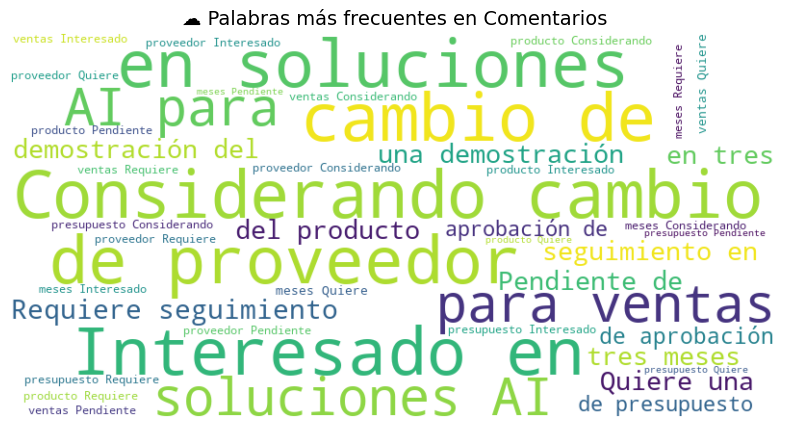

In [75]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Unir textos de comentarios
texto_comentarios = ' '.join(comments['comment'].dropna())

# Crear WordCloud simple
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_comentarios)

# Mostrar WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('☁️ Palabras más frecuentes en Comentarios', fontsize=14)
plt.show()

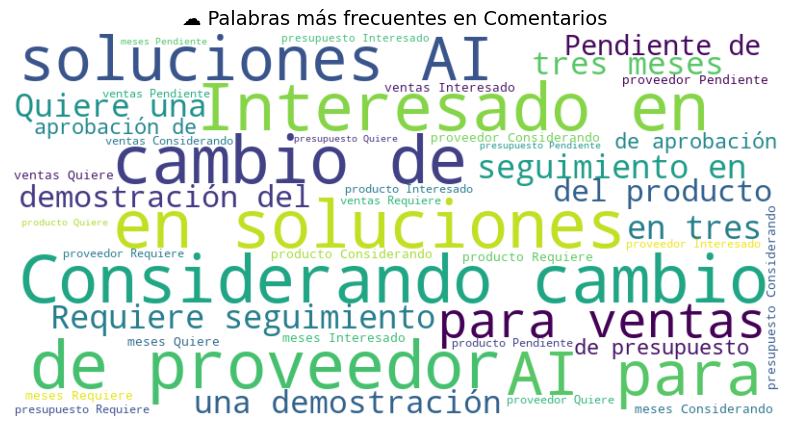

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Unir textos de comentarios
texto_comentarios = ' '.join(comments['comment'].dropna())

# Crear WordCloud simple
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_comentarios)

# Mostrar WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('☁️ Palabras más frecuentes en Comentarios', fontsize=14)
plt.show()

🔖 Guardar Reporte Exploratorio con Fecha y Hora (Histórico)

In [132]:
# 🔖 Guardar Reporte Exploratorio con Fecha y Hora (Histórico)

from datetime import datetime
import os

# Crear timestamp claro para el nombre del archivo
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Definir ruta relativa y nombre del archivo Markdown
ruta_base = "../insights/exploratory_analysis/"
nombre_archivo = f"data_quality_report_{timestamp}.md"

# Crear la carpeta automáticamente si no existe
os.makedirs(ruta_base, exist_ok=True)

# Ruta final completa
ruta_reporte = os.path.join(ruta_base, nombre_archivo)

# Contenido del reporte claramente definido
contenido_md = f"""
# 📊 Reporte Exploratorio de Calidad de Datos
> Generado automáticamente: **{timestamp}**

---

## 🔹 Resumen de Calidad de Datos:

- **Valores Nulos**:
  - Prospectos: {prospects.isnull().sum().sum()}
  - Companies: {companies.isnull().sum().sum()}
  - Comments: {comments.isnull().sum().sum()}

## 🔗 Integridad referencial:
- Prospectos con empresas inexistentes: {len(set(prospects['company_id']) - set(companies.index))}
- Comentarios sin prospecto asociado: {len(set(comments['prospect_id']) - set(prospects.index))}

## 📌 Duplicados:
- Prospectos duplicados: {prospects.duplicated().sum()}
- Empresas duplicadas: {companies.duplicated().sum()}
- Comentarios duplicados: {comments.duplicated().sum()}

---

## ✅ Conclusión:
- Bases de datos verificadas son {'✅ VÁLIDAS' if (len(set(prospects['company_id']) - set(companies.index)) == 0 and len(set(comments['prospect_id']) - set(prospects.index)) == 0) else '❌ REVISAR'} para continuar con el proyecto AI Sales Strategy.

---

## 📊 Estadísticas de Tamaño:
| Tabla      | Registros | Columnas |
|------------|-----------------|-------------|
| prospects  | {prospects.shape[0]} | {prospects.shape[1]} |
| companies  | {companies.shape[0]} | {companies.shape[1]} |
| comments  | {comments.shape[0]} | {comments.shape[1]} |

---

"""

# Ruta del reporte con timestamp único
ruta_reporte = f"../insights/exploratory_analysis/data_quality_report_{timestamp}.md"

# Guardar el reporte claramente
with open(ruta_reporte, 'w') as file:
    file.write(contenido_md)

print(f"✅ Reporte guardado exitosamente en: {ruta_reporte}")


✅ Reporte guardado exitosamente en: ../insights/exploratory_analysis/data_quality_report_2025-03-15_12-38-08.md
